*This is a companion jupyter notebook for the publication "The Effect of Impurities in Post-Consumer Plastic Waste on the Cracking of Polyolefins with Zeolite-based Catalysts" (preprint posted to ChemRxiv under doi.org/10.26434/chemrxiv-2024-4fq4v.) It provides an executable version of the manuscript, generating all figures and analyses from raw experimental data.*
# Companion Notebook for: Post-consumer plastic waste impurities in catalytic cracking of polyolefins
 Sebastian Rejman, Nasrin Faroughi, Ina Vollmer,* and Bert M. Weckhuysen*

Inorganic Chemistry and Catalysis, Institute for Sustainable and Circular Chemistry, Department of Chemistry, Utrecht University, Universiteitsweg 99, 3584 CG Utrecht, The Netherlands.


## Installing of modules and downloading data (Google colab only. Comment the following cells out if running locally)

In [1]:
#installation stuff here

This notebook is set up to run in google colab. If you intend to run this notebook on your own machine, check the readme file instructions.
We first get the required code and install the necessary modules. If the kernel crashes, restart from the cell below.

## Importing of packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utils.general as utils
from matplotlib import pyplot as plt, ticker as mticker
import pyTGA as tga
import numpy as np
utils.set_plot_params()

In [2]:
usr = os.path.expanduser('~')
home = os.path.join(usr, 'OneDrive - Universiteit Utrecht','Plastic team', 'Paper', '2024_impurities')
data_dir = os.path.join(home, 'data')
figdir = os.path.join(home, 'figures')

## Abstract
Impurities present in post-consumer plastic waste (PCPW) are a major limiting factor for the catalytic conversion of polyolefin waste into useful chemicals. While the detrimental effect of common impurities present in crude oil, like sulfur and nitrogen as well as metals and their complexes, have been studied extensively, the same cannot be said yet for impurities in PCPW. In this work, we systematically study the effects of a variety of these impurities during catalytic cracking of polyolefins using ultrastable zeolite Y (US-Y) as catalyst. We have prepared model contaminated polymer materials with controlled concentration of individual impurities and tested their impact on the catalyst activity by repeated thermogravimetric analysis with progressively more contaminated catalyst material. Our findings indicate that the most critical impurities are typical zeolite poisons, e.g., alkali metal and earth-alkali metal ions. Na, K, Ca, Mg and Cu led to noticeable zeolite deactivation at 0.14 wt% loading on pristine polymer. Inert metal oxides, such as SiO2 and TiO2 only cause deactivation at high loadings (~1 wt%) by blocking access to the zeolite surface. By contrast, cracking of S and Cl contaminated polymer did not lead to deactivation. In addition, examination of the effect of real, mixed PCPW revealed that zeolite US-Y still retains considerable activity even after processing 60 times its weight in PCPW. Metal and metal oxide impurities largely remain on the zeolite material, highlighting the potential of catalytic cracking yielding cleaner pyrolysis oil compared with thermal pyrolysis.

## Introduction
### Chemical Recycling and the Challenge of Impurities
Judging solely by weight, polyolefin plastics are one of the largest product categories of the chemical industry.<sup>1</sup> For this reason, the millions of tons of plastic waste generated every year are increasingly seen as potential feedstock for a circular chemical value chain.<sup>2,3</sup> While mechanical recycling via melting and re-extrusion remains the most desirable fate for plastic waste,<sup>4</sup> this route is not feasible for many polymer applications. One of the core reasons for this is the increasing accumulation of impurities in the recycled polymer. To increase recycling rates, chemical approaches aiming at breaking the polymer into smaller building blocks are being developed by both industrial and academic researchers.<sup>2</sup> These products can then be converted further to yield virgin-grade plastics. Especially catalytic plastic conversion routes, however, are not immune to the problem of impurities present in post-consumer plastic waste (PCPW). 
Catalysis research in the context of fossil feedstocks has long focused on impurities present in crude oil, such as sulfur. However, a switch from fossil feeds towards biomass and PCPW will introduce many new challenges due to the presence of impurities less common in crude oil, which are however known to be detrimental to catalyst materials.<sup>5</sup> The impurities present in plastic waste differ strongly from the impurities present in conventional hydrocarbon feedstocks, which shall be elaborated in a dedicated section of this work. 
Herein, we focus on the impact of PCPW impurities on the catalytic cracking of polypropylene (PP). This process is related to the more conventional pyrolysis: The polymer is heated under the exclusion of oxygen to yield a mixture of smaller hydrocarbons called pyrolysis oil (pyoil). Adding a catalyst to this process, and therefore moving from thermal pyrolysis to catalytic cracking, has two core advantages: First, the required reaction temperature can be lowered from ~470 °C to temperatures below 300 °C.<sup>6,7</sup> Secondly, the obtained pyrolysis oils have a more favorable product distribution, containing more isomerized products, valuable aromatics, and less high boiling tails.<sup>8</sup> The catalyst suitable for this process are largely solid acids such as zeolites,<sup>9,10</sup> clays<sup>11</sup> or amorphous silica-alumina.<sup>12</sup> The approach is beginning to enter commercialization, with the first plant with a capacity of 50,000 tons per year to be completed in 2025.<sup>13</sup>
Prior studies on the impact of PCPW impurities in this process relatively scarce. In one noteworthy publication, Jerdy and coworkers studied the effect of multiple common polymer additives. They found that for example metallic stearates and phosphites lead to permanent deactivation of a zeolite ZSM-5 material.<sup>14</sup> On the other hand, Ngu and coworkers investigated common organic plastic additives, and found them to not significantly impact the cracking catalyst activity.<sup>15</sup> 
Further insights can be drawn from the fluid catalytic cracking (FCC) literature. Due to their prevalence in the FCC feedstock, namely vacuum gas oil (VGO), iron (Fe), nickel (Ni) and vanadium (V) are viewed as one of the most important catalyst poisons, and are often artificially introduced on FCC catalysts to simulate the effect of deposition during the process on activity.<sup>16</sup> Fe and calcium (Ca) impurities can clog catalyst pores.<sup>16,17</sup> In addition, Ca is known in the industry as a catalyst for the dealumination of zeolites, leading to faster degradation of the zeolite in the FCC catalyst.<sup>17</sup> Alkali metals like sodium and potassium (Na and K) are known to poison acid sites, and also enhance zeolite degradation during coke burnoff.<sup>18</sup> Most metal impurities present in the (VGO) feed remain on the FCC catalyst.<sup>18</sup> It is important to state that the detrimental effect of especially Fe, Ni and V is not only catalyst deactivation, but these impurities also enhances undesired hydrogenation-dehydrogenation reactions, thereby altering the reaction product selectivity.<sup>18</sup>
Most publications on catalytic cracking of plastics, including our own work, largely rely on pristine polymers. In some cases, cleaned material from individual items (such as yoghurt cups) were used,<sup>2,6</sup> yet these materials cannot capture the diversity of impurities present in post-consumer plastic. In this work, we aim at better understanding how impurities in PCPW affect the activity and stability of zeolite-based catalyst materials in the cracking of PP. Furthermore, we study to what extent the impurities present in PCPW make their way into the pyoil, and how these impurities impact the overall reaction selectivity and productivity.


### Scientific Approach
First, we identified common impurities in PCPW based on published literature and elemental analysis of a mixed PCPW sample. The sample utilized herein originates from polyolefin films from mixed Dutch plastic waste. The shredded plastic was hydrothermally treated by a proprietary process to separate other polymer types.19 For the purpose of this work, this sample has several advantages compared to polymer obtained for example from a single, cleaned post-packaging item such as a yoghurt cup. Through the shredding and thermal treatment, the sample is homogenized, albeit to a limited extent. Small amounts of this sample contain therefore a broader range of impurities as well as polyolefins – providing a smaller scale model for a polyolefinic PCPW waste stream. 
Individual impurities identified in the first step were then deposited on pristine PP from solution or suspension. This allowed us to investigate the impact of each impurity individually. Impurities were introduced on the surface of PP with small particle sizes. While this approach does not yield a homogenous distribution of the impurities in the polymer as would be achievable with for example extrusion, it is a lot more experimentally accessible. Furthermore, after melting of the small particle PP during catalytic testing, impurities will be distributed in-situ. We believe that this approach resembles the introduction of impurities on the catalyst by PCPW cracking more closely than direct impregnation on the catalyst. A low molecular weight (Mw) PP was used to avoid limitations by macroscopic contact issues, which were described in prior work by our group.6
As model catalyst we have utilized an ultrastable zeolite Y already used in our previous publication under the label ZY55.9 Activity was tested by thermogravimetric analysis (TGA), as described previously.6,9 It is important to note that in this work we exclusively focus on permanent deactivation, that cannot be restored by calcination of the zeolite material. Additionally, we have tested conversion of PCPW by conducting consecutive cracking runs with PCPW, and then utilized activity in the cracking of uncontaminated low Mw PP as a probe for deactivation. 
Semi-batch reactor experiments with both model polymers and PCPW enabled to study the effects of impurities on the reaction selectivity. Elemental analysis of pyoils and catalyst materials was used to investigate the fate of individual impurities. Characterization of used zeolite by infrared (IR) spectroscopy of adsorbed pyridine (Py-IR) as well as nitrogen physisorption shed light on deactivation mechanisms.

### Which Impurities are Present in the Post-Consumer Plastic Waste?
Detailed and systematic studies of impurities in PCPW are in their infancy. The core problem is that PCPW comes in very heterogeneous bales. Hence, how to take a representative sample for proper analysis is not a trivial problem.20 Kusenberg and coworkers conducted comprehensive analysis of different types of PCPW and pyoils derived from them.21 Their samples contained between 0.3-0.9 wt% metals (especially Ca, Al, K, Mg, Na, and Ti), and showed chlorine contents of 0.13-0.36 wt%.
Impurities can enter PCPW across all stages of its lifecycle (Fig. 1a). During olefin polymerization, the catalyst material remains dispersed in small quantities within the final polymer material.22 In compounding, various additives can be introduced. For example, metal stearates are slip agents which aid during extrusion12, while CaCO3 is a common filler material, as are silica and TiO¬¬2.23 Furthermore, pigments, like phthalocyanine green24, can be a source of chlorine. 
During the use of the plastic material, additional impurities like NaCl can be introduced, and during disposal the plastic can be exposed to a plethora of different materials. To identify further impurities and their concentration, elemental analysis of a PCPW sample introduced above was conducted. Fig. 1b shows the abundance of impurities present in significant concentrations loosely divided on the level of concern for a plastic cracking process. We stress that this assessment is qualitative and subjective. A summary of common impurities, with likely origin and justification of the level of concern is provided in Table E1. The diversity of impurities found in significant amounts on this sample shows its suitability as a model for PCPW. In this work, we exclusively focus on impurities on an elemental basis. For example, we do not investigate the effect of different organic impurities or additives, as organic additives have been previously shown to have little effect on solid acid catalysts, such as zeolite materials.15


## Figure 1 Bubble charet impuritites

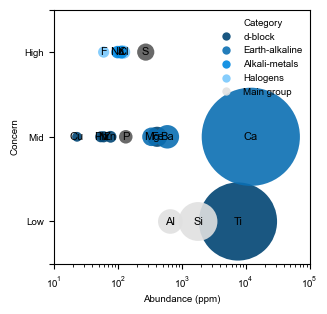

In [3]:
#Reading 
df = pd.read_csv( os.path.join(data_dir, 'Data_post_consumer.csv'))

plt.figure(figsize=(3.3,3.3))

custom_palette = {
    "d-block": "#014573",
    "Earth-alkaline": "#0B6FB3",
    "Alkali-metals": "#0087E0",
    "Halogens": "#79C8FC",
    "Main group": "#E0E0E0",
    "Non-metals": "#595959"
}
ax = sns.scatterplot(
    data=df,
    x='Abundance (ppm)',
    y='Concern',
    hue='Category',
    size='Abundance (ppm)',
    alpha=0.9,
    palette=custom_palette,
    sizes=(50, 5000),
    edgecolor='none'

)

handles, labels = ax.get_legend_handles_labels()


new_handles = handles[:len(set(df["Category"]))]
new_labels = labels[:len(set(df["Category"]))]


ax.legend(new_handles, new_labels, bbox_to_anchor=(0.6, 1), loc="upper left",frameon =False)

for i, row in df.iterrows():
    plt.text(row['Abundance (ppm)'], row["Concern"], row["Element"],
             ha="center", va="center", fontsize=8)

plt.xscale('log')

plt.xlabel('Abundance (ppm)')
plt.ylabel('Concern')
plt.yticks([0.5,1, 2, 3,3.5], ['','Low', 'Mid', 'High',''])
plt.xlim(10, 10**5)

plt.savefig(os.path.join(figdir, 'Abundance_vs_concern.svg'), transparent=True)
plt.show()

## Figure 2 Effect of Metals


- Select experiments
- plot Tmax as function of laoding

### Placeholder preprocessing TGA data

## Ratio plots 1

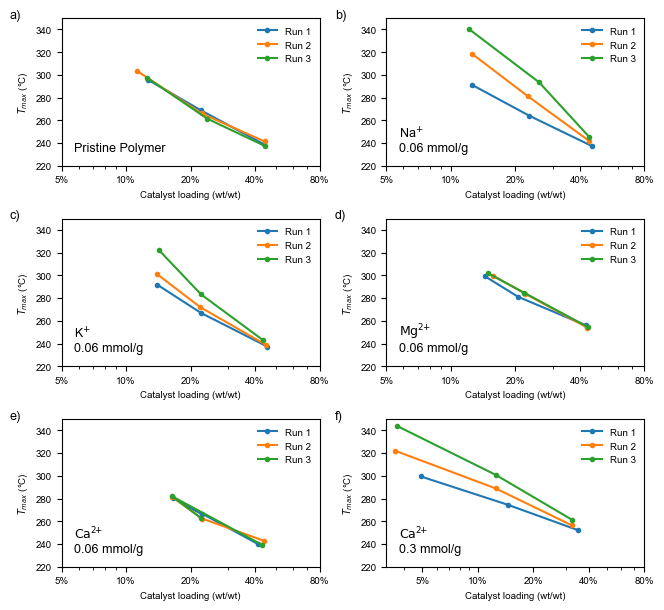

In [4]:
tga_experiments = os.listdir(os.path.join(data_dir, 'tga'))
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv',names=['experiment_number', 'label'])
sel_exp_nums = [1,2,4,6,3,30]
selected_exps = [tga_experiments[i-1] for i in sel_exp_nums]

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(3, 2, figsize=(3.3*2,3.3/1.618*3))

for i, exp in enumerate(selected_exps):
    ax = axs[i//2,(i+2)%2]
    exp = selected_exps[i]
    exp_dir = os.listdir(os.path.join(data_dir, 'tga', exp,'outputs'))
    #in exp dir find the file that contains 'Results_full and read it as csv'
    result_file = [file for file in exp_dir if 'Results_full' in file][0]
    df = pd.read_csv(os.path.join(data_dir, 'tga', exp,'outputs', result_file))
    for run in df['num_run'].unique():
        df_run = df[df['num_run'] == run]
        ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

    #Formatting
    ax.set_xscale('log')
    ax.set_ylim(220,350)
    ticks1 = [5,10,20,40,80]
    ax.legend(frameon=False)

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.set_xticklabels([str(x)+ '%' for x in ticks1])
    ax.set_xlabel('Catalyst loading (wt/wt)')
    ax.set_ylabel('$T_{max}$ (°C)')
    exp_num = int(exp.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'), 
                xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)   
# add a-f
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_3_Metals_1.svg'), transparent=True)

### Coking Metals 1

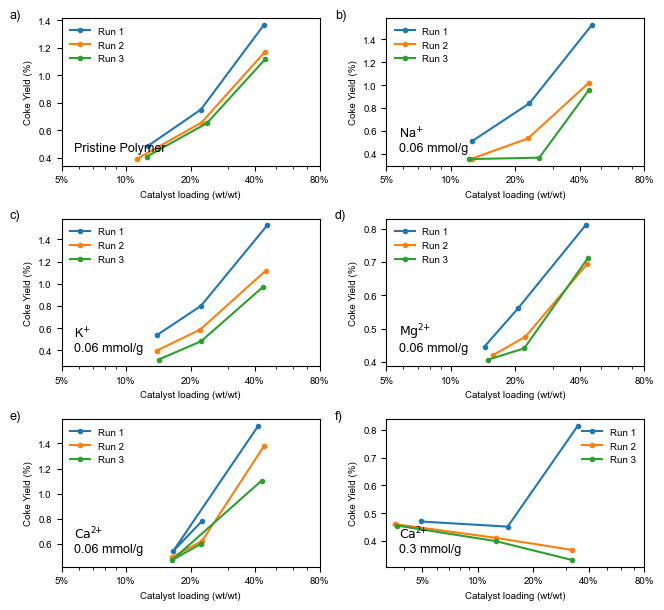

In [5]:
tga_experiments = os.listdir(os.path.join(data_dir, 'tga'))
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv',names=['experiment_number', 'label'])
sel_exp_nums = [1,2,4,6,3,30]
selected_exps = [tga_experiments[i-1] for i in sel_exp_nums]

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(3, 2, figsize=(3.3*2,3.3/1.618*3))

for i, exp in enumerate(selected_exps):
    ax = axs[i//2,(i+2)%2]
    exp = selected_exps[i]
    exp_dir = os.listdir(os.path.join(data_dir, 'tga', exp,'outputs'))
    #in exp dir find the file that contains 'Results_full and read it as csv'
    result_file = [file for file in exp_dir if 'Results_full' in file][0]
    df = pd.read_csv(os.path.join(data_dir, 'tga', exp,'outputs', result_file))
    for run in df['num_run'].unique():
        df_run = df[df['num_run'] == run]
        ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['coke_weight']/df_run['polymer_weight']*100,'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

    #Formatting
    ax.set_xscale('log')
    # ax.set_ylim(220,350)
    ticks1 = [5,10,20,40,80]
    ax.legend(frameon=False)

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.set_xticklabels([str(x)+ '%' for x in ticks1])
    ax.set_xlabel('Catalyst loading (wt/wt)')
    ax.set_ylabel('Coke Yield (%)')
    exp_num = int(exp.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'), 
                xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)   
# add a-f
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_3_Metals_1_coking.svg'), transparent=True)

In [6]:
df_run

,filename,Tmax,T50,polymer_weight,cat_weight,coke_weight,num_loading,num_run
6,031_NF_1_PP1-004_Ca_HL_ZY_S310201_3_1.txt,261.33,254.81,4.661604,1.511964,0.015447,1,3
7,031_NF_1_PP1-004_Ca_HL_ZY_S310202_3_2.txt,300.82,292.41,4.724342,0.591567,0.018869,2,3
8,031_NF_1_PP1-004_Ca_HL_ZY_S310203_3_3.txt,343.92,334.24,4.649036,0.169581,0.021172,3,3


In [7]:
tga_experiments

['001_NF_1_PP1-004_N_N_ZY',
 '002_NF_1_PP1-004_Na_LL_ZY',
 '003_NF_1_PP1-004_Ca_LL_ZY',
 '004_NF_1_PP1-004_K_LL_ZY',
 '005_NF_1_PP1-004_TiO2_LL_ZY',
 '006_NF_1_PP1-004_MgCl.6H2o_LL_ZY',
 '007_NF_1_PP1-004_SiO2_LL_ZY',
 '008_NF_1_PP1-004_(NH4)2SO4_LL_ZY',
 '009_NF_1_PP1-004_NH4Cl_LL_ZY',
 '010_NF_1_PP1-004_Pigment_LL_ZY',
 '011_NF_1_PP1-004_Cu_LL_ZY',
 '012_NF_1_HMWPVC_Cl_LL_N',
 '013_NF_1_LMWPVC_Cl_LL_N',
 '014_NF_1_PPVC_Cl_LL_N',
 '015_NF_1_HMWPVC_Cl_LL_ZY',
 '016_NF_1_LMWPVC_Cl_LL_ZY',
 '017_NF_1_PPVC_Cl_LL_ZY',
 '019_NF_1_PP1-004_N_N_S016ZY',
 '020_NF_1_PP1-004_N_N_ZY',
 '021_NF_1_Polybutadiene_N_LL_N',
 '022_NF_1_Polybutadiene_N_LL_ZY',
 '023_NF_1_RPW_All_HL_N',
 '024_NF_1_RPW_All_HL_ZY',
 '025_NF_1_PP1-004_All_HL_S024ZY',
 '026_NF_1_PP1-004_N_N_ZY',
 '027_NF_1_RPW_All_HL_ZY',
 '028_NF_1_PP1-004_All_HL_S027ZY',
 '029_NF_1_treatmentRPW_All_HL_ZY',
 '030_NF_1_PP1-004_N_N_ZY_newCalibration',
 '031_NF_1_PP1-004_Ca_HL_ZY',
 '032_NF_1_PP1-004_TiO2_HL_ZY']

## Figure for oxides

005_NF_1_PP1-004_TiO2_LL_ZY
007_NF_1_PP1-004_SiO2_LL_ZY
032_NF_1_PP1-004_TiO2_HL_ZY


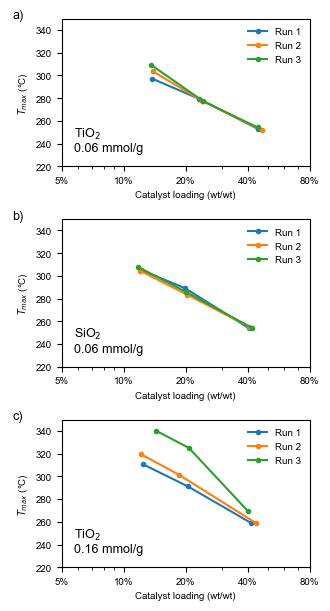

In [8]:
%matplotlib widget

tga_experiments = os.listdir(os.path.join(data_dir, 'tga'))
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv',names=['experiment_number', 'label'])
sel_exp_nums = [5,7,31]
selected_exps = [tga_experiments[i-1] for i in sel_exp_nums]

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(3, 1, figsize=(3.3*1,3.3/1.618*3))

for i, exp in enumerate(selected_exps):
    ax = axs[i]
    exp_dir = os.listdir(os.path.join(data_dir, 'tga', exp,'outputs'))
    print(exp)
    #in exp dir find the file that contains 'Results_full and read it as csv'
    result_file = [file for file in exp_dir if 'Results_full' in file][0]
    df = pd.read_csv(os.path.join(data_dir, 'tga', exp,'outputs', result_file))
    for run in df['num_run'].unique():
        df_run = df[df['num_run'] == run]
        ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

    #Formatting
    ax.set_xscale('log')
    ax.set_ylim(220,350)
    ticks1 = [5,10,20,40,80]
    ax.legend(frameon=False)

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.set_xticklabels([str(x)+ '%' for x in ticks1])
    ax.set_xlabel('Catalyst loading (wt/wt)')
    ax.set_ylabel('$T_{max}$ (°C)')
    exp_num = int(exp.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'), 
                xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)   
#add a-c
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_4_oxides.svg'), transparent=True)
plt.show()

### Chlorine

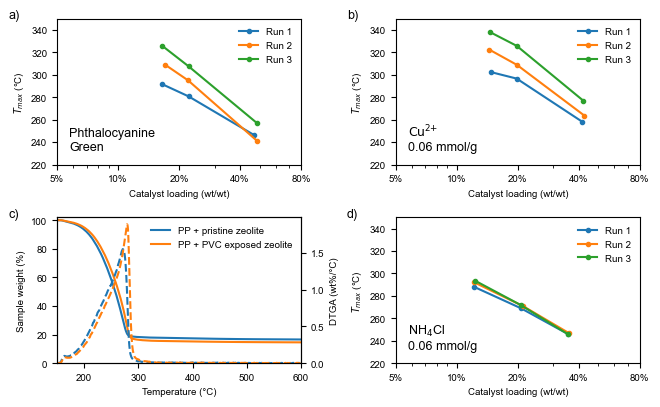

In [9]:
#plotting consectutive experiments first, then PVC

tga_experiments = os.listdir(os.path.join(data_dir, 'tga'))
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv',names=['experiment_number', 'label'])
sel_exp_nums = [10,11,9]
selected_exps = [tga_experiments[i-1] for i in sel_exp_nums]

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(2, 2, figsize=(3.3*2,3.3/1.618*2))
for i, exp in enumerate(selected_exps):
    ax = axs[i//2,(i+2)%2]
    if i == 2:
        ax = axs[1,1]
    exp = selected_exps[i]
    exp_dir = os.listdir(os.path.join(data_dir, 'tga', exp,'outputs'))
    #in exp dir find the file that contains 'Results_full and read it as csv'
    result_file = [file for file in exp_dir if 'Results_full' in file][0]
    df = pd.read_csv(os.path.join(data_dir, 'tga', exp,'outputs', result_file))
    for run in df['num_run'].unique():
        df_run = df[df['num_run'] == run]
        ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

    #Formatting
    ax.set_xscale('log')
    ax.set_ylim(220,350)
    ticks1 = [5,10,20,40,80]
    ax.legend(frameon=False)

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.set_xticklabels([str(x)+ '%' for x in ticks1])
    ax.set_xlabel('Catalyst loading (wt/wt)')
    ax.set_ylabel('$T_{max}$ (°C)')
    exp_num = int(exp.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'), 
                xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)   
# add a-d
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)


# plotting PVC experiment




path_justPP = os.path.join(data_dir, 'tga', '020_NF_1_PP1-004_N_N_ZY', 'raw', '020_NF_1_PP1-004_N_N_ZY_1','020_NF_1_PP1-004_N_N_ZY_P_1_1.txt')
path_PVC_PP = os.path.join(data_dir, 'tga', '019_NF_1_PP1-004_N_N_S016ZY', 'raw','019_NF_1_PP1-004_N_N_ZY_1', '019_NF_1_PP1-004_N_N_ZY_S160101_1_1.txt')

just_PP = tga.parse_txt(path_justPP, exp_type='pyro',calculate_DTGA=True).cracking()
pvc_PP = tga.parse_txt(path_PVC_PP, exp_type='pyro',calculate_DTGA=True).cracking()

# test_path = 'C:/Users/Rejma001/OneDrive - Universiteit Utrecht/Students/Nasrin/data/tga/test/NF_TGA_001_Real waste p_001_0001.txt'
# test = tga.parse_txt(test_path, type='pyro',calculate_DTGA=True).cracking()
ax1 = axs[1,0]
ax2 = ax1.twinx()

ax1.plot(just_PP['Sample Temp.'],just_PP['rel_weight_twl']*100,label='PP + pristine zeolite',color='C0')
ax2.plot(just_PP['Sample Temp.'],just_PP['DTGA_twl']*100,color='C0', linestyle='dashed')
ax1.plot(pvc_PP['Sample Temp.'],pvc_PP['rel_weight_twl']*100,label='PP + PVC exposed zeolite',color='C1')
ax2.plot(pvc_PP['Sample Temp.'],pvc_PP['DTGA_twl']*100,color='C1', linestyle='dashed')

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Sample weight (%)')
ax2.set_ylabel('DTGA (wt%/°C)')
ax1.legend(frameon=False)

ax1.set_xlim(150,600)
ax1.set_ylim(0,102)
ax2.set_ylim(0,)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_Chlorine.svg'), transparent=True)

### Post consumer

In [10]:
%matplotlib widget

### Characterization of PCPW

Thermal degradation temperature PCPW 471.92 °C
Solid content of PCPW: 5.38%


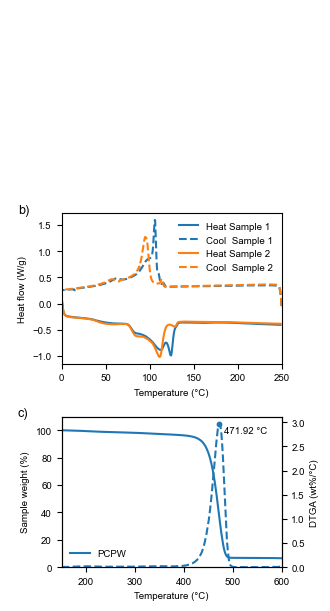

In [11]:
# TGA
path_PCPW_thermal = os.path.join(data_dir, 'tga', '023_NF_1_RPW_All_HL_N', 'raw', '023_NF_1_RPW_All_HL_N_1','023_NF_1_RPW_All_HL_N_1_1.txt')

PCPW_thermal = tga.parse_txt(path_PCPW_thermal, exp_type='pyro',calculate_DTGA=True).cracking()
PCPW_burnoff = tga.parse_txt(path_PCPW_thermal, exp_type='pyro',calculate_DTGA=True).burnoff()


fig, axs = plt.subplots(3, 1, figsize=(3.3,3.3/1.618*3))
ax1 = axs[2]
ax2 = ax1.twinx()
ax1.plot(PCPW_thermal['Sample Temp.'],PCPW_thermal['rel_weight_twl']*100,label='PCPW',color='C0')
ax2.plot(PCPW_thermal['Sample Temp.'],PCPW_thermal['DTGA_twl']*100,color='C0', linestyle='dashed')

#tmax
print('Thermal degradation temperature PCPW {} °C'.format(tga.calc_Tmax(PCPW_thermal)))
print('Solid content of PCPW: {}%'.format(np.round(PCPW_burnoff['Unsubtracted weight'].iloc[-1]/PCPW_thermal['Unsubtracted weight'].iloc[0],4)*100))
ax2.scatter(tga.calc_Tmax(PCPW_thermal), PCPW_thermal['DTGA_twl'].max()*100, color='C0', s= 10)
ax1.annotate('{} °C'.format(tga.calc_Tmax(PCPW_thermal)), xy=(tga.calc_Tmax(PCPW_thermal)+10, 98),  fontsize=7)

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Sample weight (%)')
ax2.set_ylabel('DTGA (wt%/°C)')
ax1.legend(frameon=False, loc= 'lower left')

ax1.set_xlim(150,600)
ax1.set_ylim(0,110)
ax2.set_ylim(0,)









# DSC 
dir_DSC = os.path.join(data_dir, 'DSC')
DSC_files = os.listdir(dir_DSC)

ax = axs[1]
colors = ['C0','C1']
for file in enumerate(DSC_files):
    heat_1 = pd.read_excel(os.path.join(dir_DSC, file[1]),sheet_name='Ramp 10.00 °Cmin to 250.00 °C', skiprows=2,)
    ax.plot(heat_1['°C'], heat_1['W/g'],  label= 'Heat Sample '+str(file[0]+1), color=colors[file[0]])
    cool_1 = pd.read_excel(os.path.join(dir_DSC, file[1]),sheet_name='Ramp 10.00 °Cmin to 0.00 °C', skiprows=2)
    ax.plot(cool_1['°C'], cool_1['W/g'], label= 'Cool  Sample '+str(file[0]+1), color=colors[file[0]], linestyle='dashed')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Heat flow (W/g)')
ax.legend(frameon=False)
ax.set_xlim(0,250)

#remove plot 0
axs[0].remove()
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)


plt.tight_layout()
plt.savefig(os.path.join(figdir, 'PCPW_char.svg'), transparent=True)
plt.show()

In [12]:
heat_1

,min,°C,W/g
0,0.0075,0.09,0.0746
1,0.0240,0.09,0.0677
2,0.0410,0.10,0.0596
3,0.0580,0.11,0.0551
4,0.0740,0.15,0.0569
...,...,...,...
1495,25.0000,247.85,-0.3847
1496,25.0000,248.02,-0.3848
1497,25.0000,248.19,-0.3849
1498,25.0000,248.35,-0.3850


In [13]:
heat_1.sheet_names

AttributeError: 'DataFrame' object has no attribute 'sheet_names'

024_NF_1_RPW_All_HL_ZY
030_NF_1_PP1-004_N_N_ZY_newCalibration
025_NF_1_PP1-004_All_HL_S024ZY


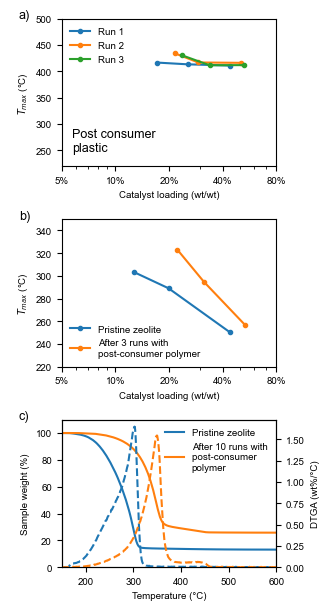

In [ ]:
tga_experiments = os.listdir(os.path.join(data_dir, 'tga'))
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv',names=['experiment_number', 'label'])

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(3, 1, figsize=(3.3*1,3.3/1.618*3))

#a---------------------------------------
ax = axs[0]

exp = tga_experiments[22]
exp_dir = os.listdir(os.path.join(data_dir, 'tga', exp,'outputs'))
print(exp)
#in exp dir find the file that contains 'Results_full and read it as csv'
result_file = [file for file in exp_dir if 'Results_full' in file][0]
df = pd.read_csv(os.path.join(data_dir, 'tga', exp,'outputs', result_file))
for run in df['num_run'].unique():
    df_run = df[df['num_run'] == run]
    ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

#Formatting
ax.set_xscale('log')
ax.set_ylim(220,500)
ticks1 = [5,10,20,40,80]
ax.legend(frameon=False)

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_xticklabels([str(x)+ '%' for x in ticks1])
ax.set_xlabel('Catalyst loading (wt/wt)')
ax.set_ylabel('$T_{max}$ (°C)')
exp_num = int(exp.split('_')[0])
ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'), 
            xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)   


#b---------------------------------------

ax = axs[1]
# for pristine zeolite
exp = tga_experiments[28]
exp_dir = os.listdir(os.path.join(data_dir, 'tga', exp,'outputs'))
print(exp)
#in exp dir find the file that contains 'Results_full and read it as csv'
result_file = [file for file in exp_dir if 'Results_full' in file][0]
df = pd.read_csv(os.path.join(data_dir, 'tga', exp,'outputs', result_file))
run = 1
df_run = df[df['num_run'] == run]
ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Pristine zeolite')


# after runs with contaminated polymer
exp = tga_experiments[23]
exp_dir = os.listdir(os.path.join(data_dir, 'tga', exp,'outputs'))
print(exp)
#in exp dir find the file that contains 'Results_full and read it as csv'
result_file = [file for file in exp_dir if 'Results_full' in file][0]
df = pd.read_csv(os.path.join(data_dir, 'tga', exp,'outputs', result_file))
run = 1
df_run = df[df['num_run'] == run]
ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color='C1',label='After 3 runs with\npost-consumer polymer')

#Formatting
ax.set_xscale('log')
ax.set_ylim(220,350)
ticks1 = [5,10,20,40,80]
ax.legend(frameon=False)

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_xticklabels([str(x)+ '%' for x in ticks1])
ax.set_xlabel('Catalyst loading (wt/wt)')
ax.set_ylabel('$T_{max}$ (°C)')
exp_num = int(exp.split('_')[0])
# ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'), 
#             xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)   


#c---------------------------------------
path_justPP = os.path.join(data_dir, 'tga', '026_NF_1_PP1-004_N_N_ZY', 'raw', '026_NF_1_PP1-004_N_N_ZY_1','026_NF_1_PP1-004_N_N_ZY_1_1.txt')
path_post_consumer_PP = os.path.join(data_dir, 'tga', '028_NF_1_PP1-004_All_HL_S027ZY', 'raw','028_NF_1_PP1-004_All_HL_S027ZY_1', '028_NF_1_PP1-004_All_HL_ZY_S270901_1_11.txt')

just_PP = tga.parse_txt(path_justPP, exp_type='pyro',calculate_DTGA=True).cracking()
pvc_PP = tga.parse_txt(path_post_consumer_PP, exp_type='pyro',calculate_DTGA=True).cracking()

# test_path = 'C:/Users/Rejma001/OneDrive - Universiteit Utrecht/Students/Nasrin/data/tga/test/NF_TGA_001_Real waste p_001_0001.txt'
# test = tga.parse_txt(test_path, type='pyro',calculate_DTGA=True).cracking()
ax1 = axs[2]
ax2 = ax1.twinx()

ax1.plot(just_PP['Sample Temp.'],just_PP['rel_weight_twl']*100,label='Pristine zeolite',color='C0')
ax2.plot(just_PP['Sample Temp.'],just_PP['DTGA_twl']*100,color='C0', linestyle='dashed')
ax1.plot(pvc_PP['Sample Temp.'],pvc_PP['rel_weight_twl']*100,label='After 10 runs with\npost-consumer \npolymer',color='C1')
ax2.plot(pvc_PP['Sample Temp.'],pvc_PP['DTGA_twl']*100,color='C1', linestyle='dashed')

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Sample weight (%)')
ax2.set_ylabel('DTGA (wt%/°C)')
ax1.legend(frameon=False)

ax1.set_xlim(150,600)
ax1.set_ylim(0,110)
ax2.set_ylim(0,)



for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_Post_consumer.svg'), transparent=True)
plt.show()

### Mass balances

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Sebastian\\OneDrive - Universiteit Utrecht\\Plastic team\\Paper\\2024_impurities\\Analysis\\Sample_preparation_massbalance.xlsx'

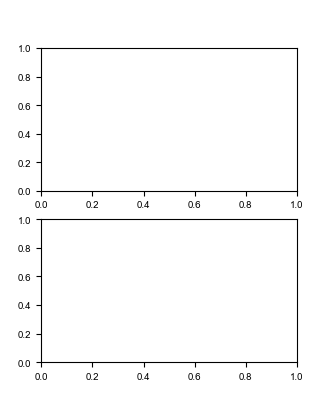

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(3.3,3.3/1.618*2))

ax = axs[0]
data_model = pd.read_excel(os.path.join(home,'Analysis', 'Sample_preparation_massbalance.xlsx'),sheet_name='MB_model_samples') # MB_PC 
names = data_model['Sample']
mb_zeolite = data_model['mass balance zeolite']*100
mb_liquid = data_model['mass balance liquid']*100

ax.barh(names, mb_zeolite, label='Zeolite')
ax.barh(names, mb_liquid, left=mb_zeolite, label='Liquid')
ax.legend(frameon=False)
ax.set_xlabel('Mass balance (%)')
ax.title.set_text('Model plastic')
# Add labels and title

ax = axs[1]
data_model = pd.read_excel(os.path.join(home,'Analysis', 'Sample_preparation_massbalance.xlsx'),sheet_name='MB_PC') 
names = data_model['Sample']
mb_zeolite = data_model['mass balance zeolite']*100
mb_liquid = data_model['mass balance liquid']*100

ax.barh(names, mb_zeolite, label='Zeolite')
ax.barh(names, mb_liquid, left=mb_zeolite, label='Liquid')
ax.legend(frameon=False)
ax.set_xlabel('Mass balance (%)')
ax.axvline(100, color='grey', linestyle='dashed', ymin=0, ymax=1)
ax.title.set_text('Post-consumer plastic')
#adda and b)
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.1, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_mass_balance.svg'), transparent=True)